# Plots with much less noise

_17 August 2021, updated 22 August 2021 to use new `plotting` module_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

This also includes plots from `parameter-scheduling.ipynb` that can be updated with more samples/iterations.

In [1]:
import matplotlib.pyplot as plt
from plotting import make_axes, plot_comparison, show_timestamp_info

In [2]:
def get_comparison_specs(clients=20, noise='__all__'):
    common_specs = {
        'rounds':                 ('expect', 150),
        'batch_size':             ('expect', 64),
        'epochs':                 ('expect', 1),
        'ema_coefficient':        ('expect', 1 / 3),
        'data_per_client':        ('expect', None),
        'save_squared_error':     ('expect', False),
        'send':                   ('expect', 'deltas'),
        'power':                  ('title', 1.0),
        'dataset':                ('title', 'fashion-mnist'),
        'lr_client':              ('title', 0.01),
        'momentum_client':        ('title', 0.0),
        'clients':                ('title', clients),
        'noise':                  ('series', noise),
    }
    analog_specs = common_specs.copy()
    analog_specs.update({
        'script': 'dynpower.py',
        'power_update_period':    ('expect', 1),
        'power_quantile':         ('expect', 0.9),
        'power_factor':           ('expect', 0.9),
    })
    digital_specs = common_specs.copy()
    digital_specs.update({
        'script': 'dynquant.py',
        'qrange_update_period':   ('expect', 1),
        'qrange_param_quantile':  ('expect', 0.9),
        'qrange_client_quantile': ('expect', 0.9),
        'channel_uses':           ('expect', None),
        'rounding_method':        ('expect', 'stochastic'),
        'parameter_schedule':     ('expect', 'staggered'),
        'zero_bits_strategy':     ('expect', 'read-zero'),
    })
    
    return analog_specs, digital_specs

def _plot_comparisons(field, paths, all_specs, zoom_ylim=None, axsize=(11, 7), **kwargs):
    axs = make_axes(2 if zoom_ylim else 1, axsize=axsize)
    plot_comparison(field, paths, *all_specs, ax=axs[0], extra_lines=['confints'], **kwargs)
    if zoom_ylim:
        plot_comparison(field, paths, *all_specs, ax=axs[1], extra_lines=['confints'], quiet=True, **kwargs)
        axs[1].set_ylim(zoom_ylim)

def plot_analog_vs_digital(paths, clients, noise='__all__', field='accuracy', zoom_ylim=None, **kwargs):
    all_specs = get_comparison_specs(clients, noise)
    _plot_comparisons(field, paths, all_specs, zoom_ylim=zoom_ylim, **kwargs)

def plot_analog_vs_digital_with_old_data(paths, clients, noise='__all__', field='accuracy', zoom_ylim=None, **kwargs):
    analog_specs, digital_specs = get_comparison_specs(clients, noise)

    # apply some modifications to account for old arguments
    digital_specs['parameter_schedule'] = ('filter', 'staggered')
    digital_specs['save_squared_error'] = ('expect', False, {'missing-treat-as': False})
    analog_specs['save_squared_error'] = ('expect', False, {'missing-treat-as': False})

    _plot_comparisons(field, paths, (analog_specs, digital_specs), zoom_ylim=zoom_ylim, **kwargs)

# Fashion-MNIST

## Only old data

In [3]:
paths = [
    "results/20210724-other-datasets-dynpower/",
    "results/20210725-other-datasets-dynpower/",
    "results/20210801-dynpower-cifarfmnist",
    "results/20210729-paramsched-cifarfmnist/",
    "results/20210730-paramsched-cifarfmnist/",
    "results/20210801-staggered-dynquant-cifarfmnist/",
    "results/20210808-staggered-dynquant-cifarfmnist/",
]
show_timestamp_info(paths)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **24 Jul 2021, 00:39:04** | 24 Jul 2021, 01:16:16 | 37 min 12 s |
| last to finish | 08 Aug 2021, 11:04:31 | **08 Aug 2021, 11:25:31** | 21 min 00 s |
| shortest | 25 Jul 2021, 01:37:20 | 25 Jul 2021, 01:57:47 | **20 min 27 s** |
| longest | 31 Jul 2021, 20:13:25 | 31 Jul 2021, 20:54:54 | **41 min 28 s** |


- Skipping 167 runs that don't match on 4 keys: dataset (158), lr_client (140), momentum_client (140), clients (30)
- Skipping 413 runs that don't match on 5 keys: dataset (269), clients (176), parameter_schedule (176), lr_client (173), momentum_client (173)


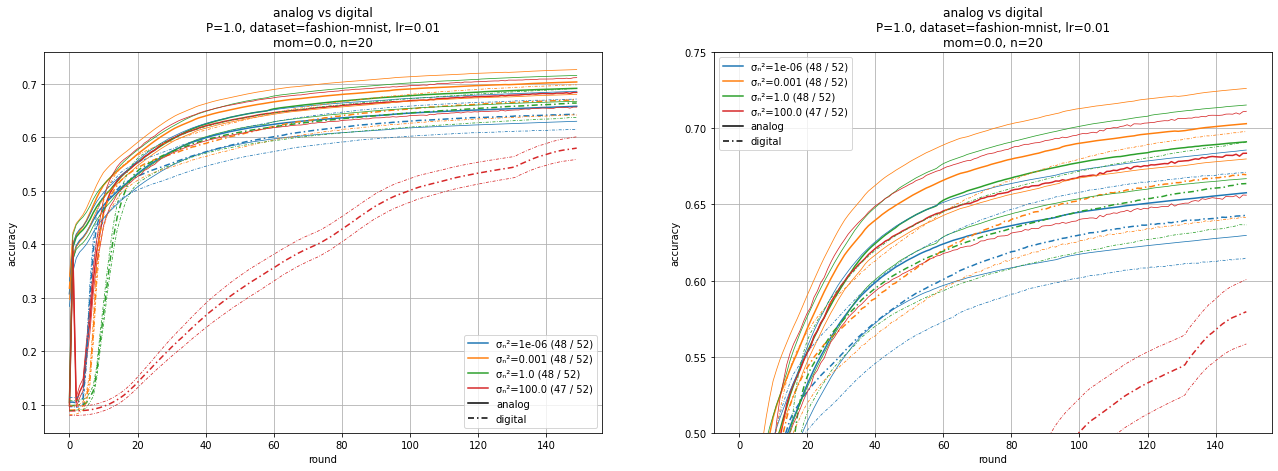

In [4]:
plot_analog_vs_digital_with_old_data(paths, clients=20, zoom_ylim=(0.5, 0.75))

- Skipping 262 runs that don't match on 5 keys: noise (173), dataset (158), lr_client (140), momentum_client (140), clients (30)
- Skipping 517 runs that don't match on 6 keys: noise (310), dataset (269), clients (176), parameter_schedule (176), lr_client (173), momentum_client (173)


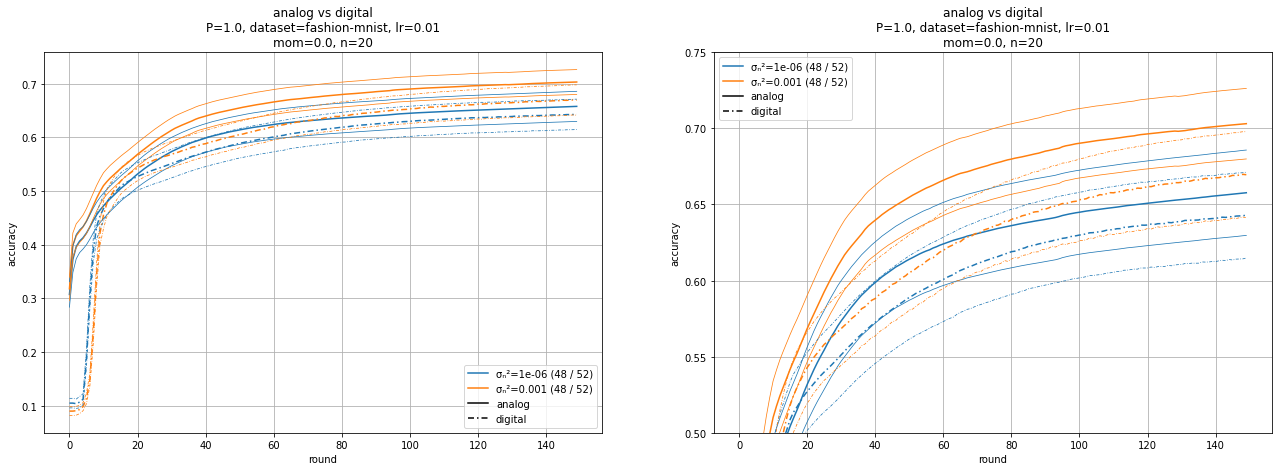

In [5]:
plot_analog_vs_digital_with_old_data(paths, clients=20, noise=[1e-6, 1e-3], zoom_ylim=(0.5, 0.75))

## Both old and new data

In [6]:
paths = [
    "results/20210724-other-datasets-dynpower/",
    "results/20210725-other-datasets-dynpower/",
    "results/20210801-dynpower-cifarfmnist",
    "results/20210813-fmnist-dynpower",
    "results/20210729-paramsched-cifarfmnist/",
    "results/20210730-paramsched-cifarfmnist/",
    "results/20210801-staggered-dynquant-cifarfmnist/",
    "results/20210808-staggered-dynquant-cifarfmnist/",
    "results/20210813-fmnist-dynquant",
]
show_timestamp_info(paths)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **24 Jul 2021, 00:39:04** | 24 Jul 2021, 01:16:16 | 37 min 12 s |
| last to finish | 16 Aug 2021, 16:02:10 | **16 Aug 2021, 16:24:10** | 21 min 59 s |
| shortest | 15 Aug 2021, 04:46:33 | 15 Aug 2021, 05:06:20 | **19 min 47 s** |
| longest | 31 Jul 2021, 20:13:25 | 31 Jul 2021, 20:54:54 | **41 min 28 s** |


/home/czlee/kyanite/plotting.py:533: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[series][field][directory] = training[field]


- Skipping 383 runs that don't match on 5 keys: noise (216), dataset (158), lr_client (140), momentum_client (140), clients (30)
- Skipping 629 runs that don't match on 6 keys: dataset (269), noise (260), clients (176), parameter_schedule (176), lr_client (173), momentum_client (173)


/home/czlee/kyanite/plotting.py:533: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[series][field][directory] = training[field]


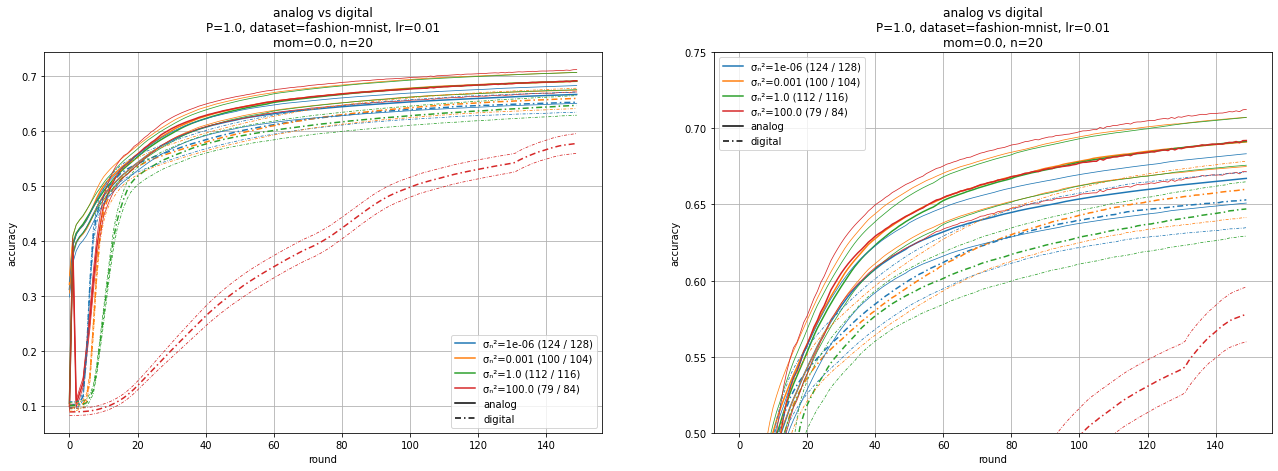

In [7]:
plot_analog_vs_digital_with_old_data(paths, clients=20, noise=[1e-6, 1e-3, 1.0, 100.0], zoom_ylim=(0.5, 0.75))

/home/czlee/kyanite/plotting.py:533: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[series][field][directory] = training[field]


- Skipping 574 runs that don't match on 5 keys: noise (485), dataset (158), lr_client (140), momentum_client (140), clients (30)
- Skipping 829 runs that don't match on 6 keys: noise (622), dataset (269), clients (176), parameter_schedule (176), lr_client (173), momentum_client (173)


/home/czlee/kyanite/plotting.py:533: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[series][field][directory] = training[field]


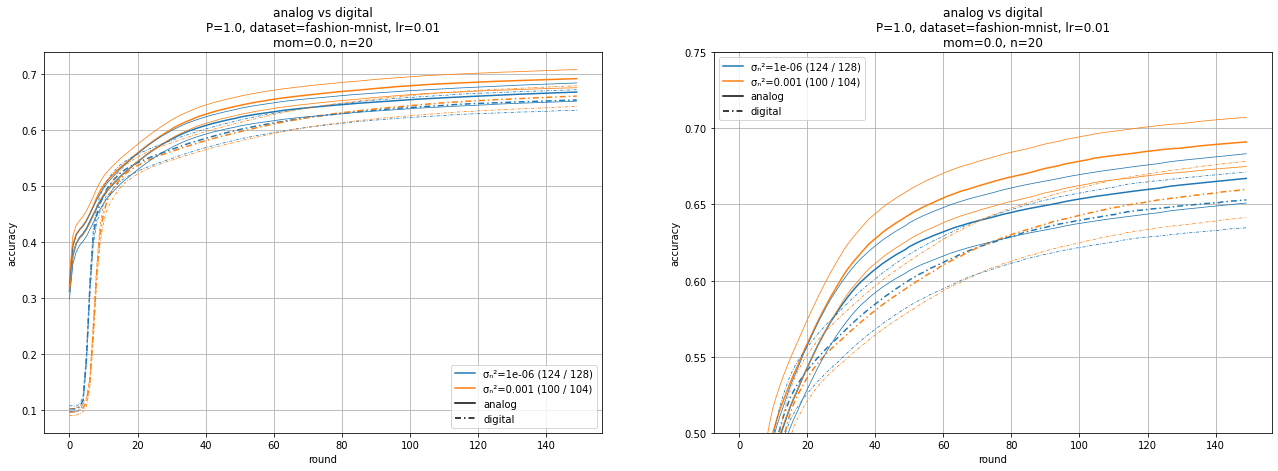

In [8]:
plot_analog_vs_digital_with_old_data(paths, clients=20, noise=[1e-6, 1e-3], zoom_ylim=(0.5, 0.75))

Maybe it's overfitting?

/home/czlee/kyanite/plotting.py:533: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[series][field][directory] = training[field]


- Skipping 383 runs that don't match on 5 keys: noise (216), dataset (158), lr_client (140), momentum_client (140), clients (30)
- Skipping 629 runs that don't match on 6 keys: dataset (269), noise (260), clients (176), parameter_schedule (176), lr_client (173), momentum_client (173)


/home/czlee/kyanite/plotting.py:533: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[series][field][directory] = training[field]


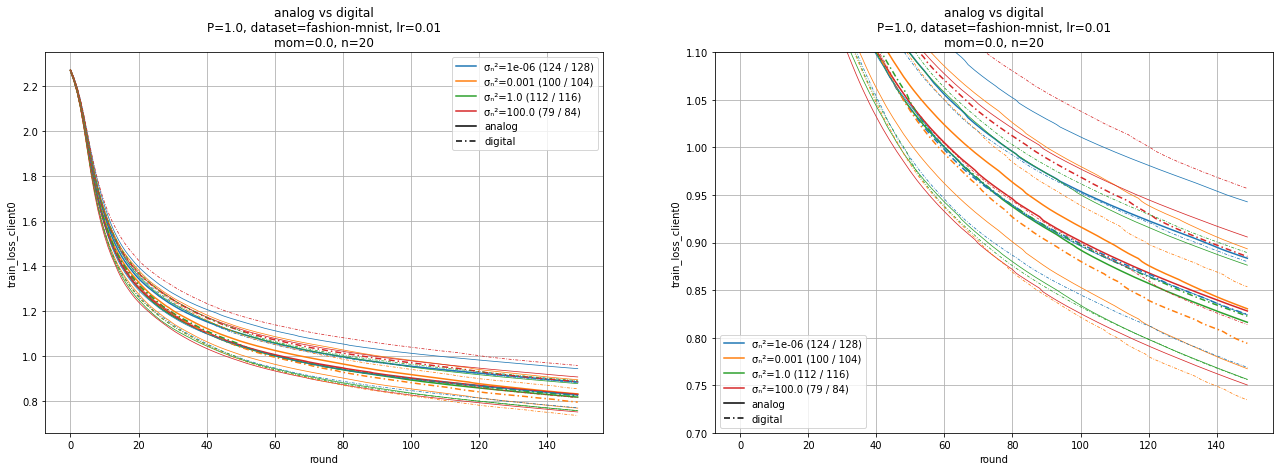

In [9]:
plot_analog_vs_digital_with_old_data(paths, clients=20, noise=[1e-6, 1e-3, 1.0, 100.0], field='train_loss_client0', zoom_ylim=(0.7, 1.1))

Nope, the high SNR is training worse too.

## Only new data

In [10]:
paths = [
    "results/20210813-fmnist-dynpower",
    "results/20210813-fmnist-dynquant",
]
show_timestamp_info(paths)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **13 Aug 2021, 03:57:59** | 13 Aug 2021, 04:27:49 | 29 min 49 s |
| last to finish | 16 Aug 2021, 16:02:10 | **16 Aug 2021, 16:24:10** | 21 min 59 s |
| shortest | 15 Aug 2021, 04:46:33 | 15 Aug 2021, 05:06:20 | **19 min 47 s** |
| longest | 16 Aug 2021, 04:12:44 | 16 Aug 2021, 04:45:56 | **33 min 11 s** |


- Skipping 216 runs that don't match on 1 keys: noise (216)
- Skipping 216 runs that don't match on 1 keys: noise (216)


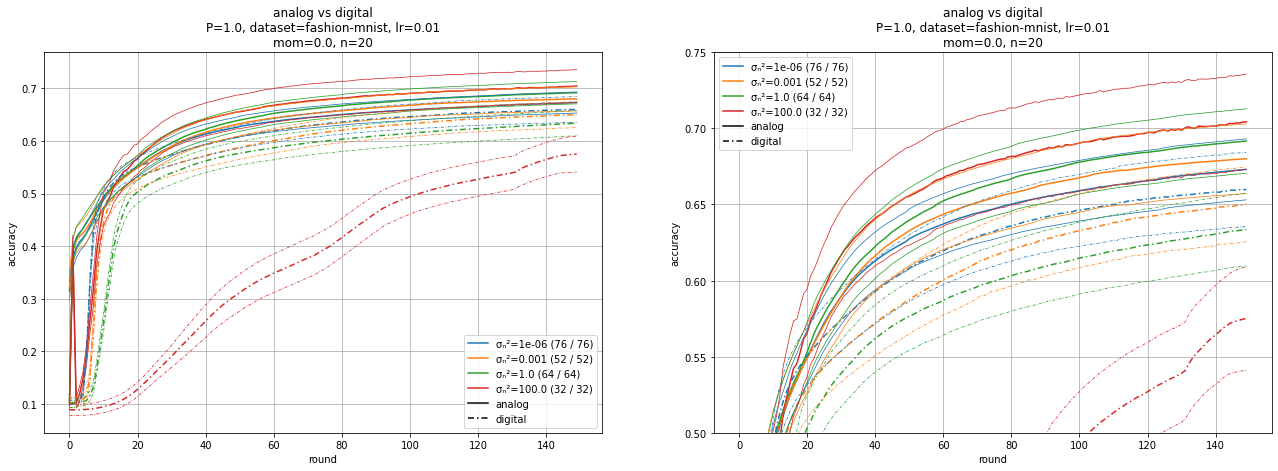

In [11]:
plot_analog_vs_digital(paths, clients=20, noise=[1e-6, 1e-3, 1.0, 100.0], zoom_ylim=(0.5, 0.75))

Comparing this to the plot in the above sections, I still think this indicates that there's too much variance, and most of the lines above are statistical ties.

- Skipping 148 runs that don't match on 1 keys: noise (148)
- Skipping 148 runs that don't match on 1 keys: noise (148)


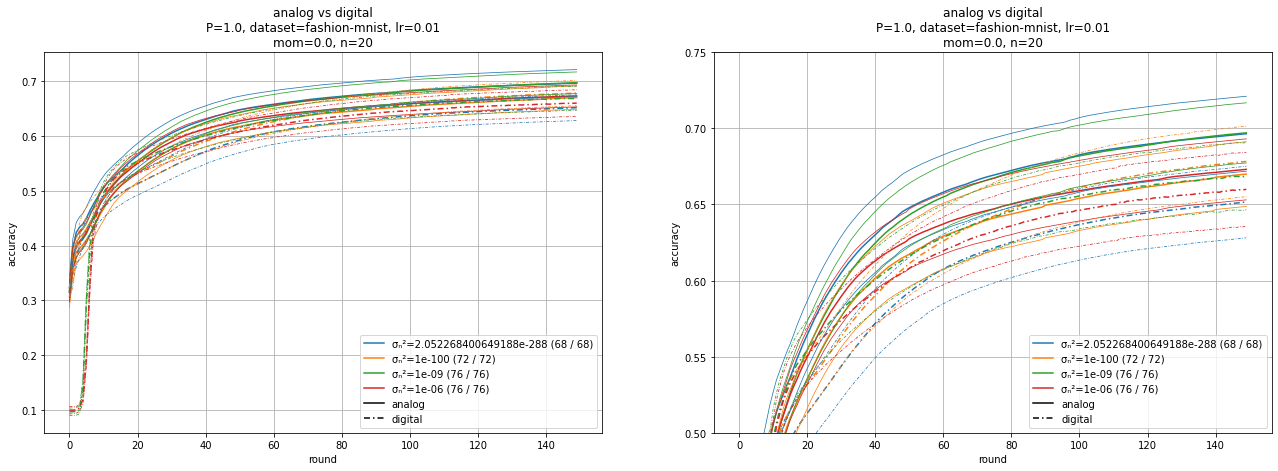

In [12]:
plot_analog_vs_digital(paths, clients=20, noise=[2.052268400649188e-288, 1e-100, 1e-9, 1e-6], zoom_ylim=(0.5, 0.75))

- Skipping 300 runs that don't match on 1 keys: noise (300)
- Skipping 300 runs that don't match on 1 keys: noise (300)


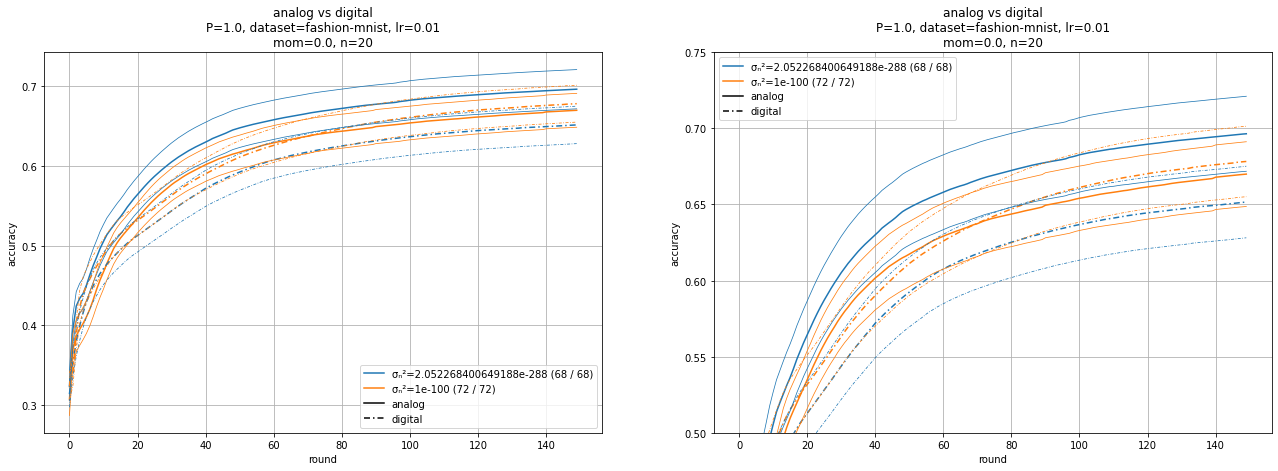

In [13]:
plot_analog_vs_digital(paths, clients=20, noise=[2.052268400649188e-288, 1e-100], zoom_ylim=(0.5, 0.75))

One of the things that's weird about this result is that if you actually generate normal samples using
```
>>> torch.normal(0.0, 1e-100, size=(20,))
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
```
you will just get a vector of zeros, not approximately zero, but exactly zero. The same of course goes for
```
>>> torch.normal(0.0, 2.052268400649188e-288, size=(20,))
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
```
so while it makes sense that there would be a digital difference in the above plots, the analog plots are basically the same experiment.

# Accidental plots with $n = 17$ and $n = 34$

These are results of experiments where I used the wrong arguments (I changed `-n` when I meant to change `-q`). Since the results are there, may as well look at them to see what they show.

In [14]:
paths = [
    "results/20210815-accident-dynpower/",
    "results/20210815-accident-dynquant/",
]

In [15]:
show_timestamp_info(paths)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **15 Aug 2021, 05:33:05** | 15 Aug 2021, 06:01:30 | 28 min 25 s |
| last to finish | 15 Aug 2021, 13:12:02 | **15 Aug 2021, 13:40:46** | 28 min 43 s |
| shortest | 15 Aug 2021, 06:57:23 | 15 Aug 2021, 07:25:26 | **28 min 02 s** |
| longest | 15 Aug 2021, 12:59:01 | 15 Aug 2021, 13:30:58 | **31 min 56 s** |


- Skipping 34 runs that don't match on 1 keys: clients (34)
- Skipping 30 runs that don't match on 1 keys: clients (30)


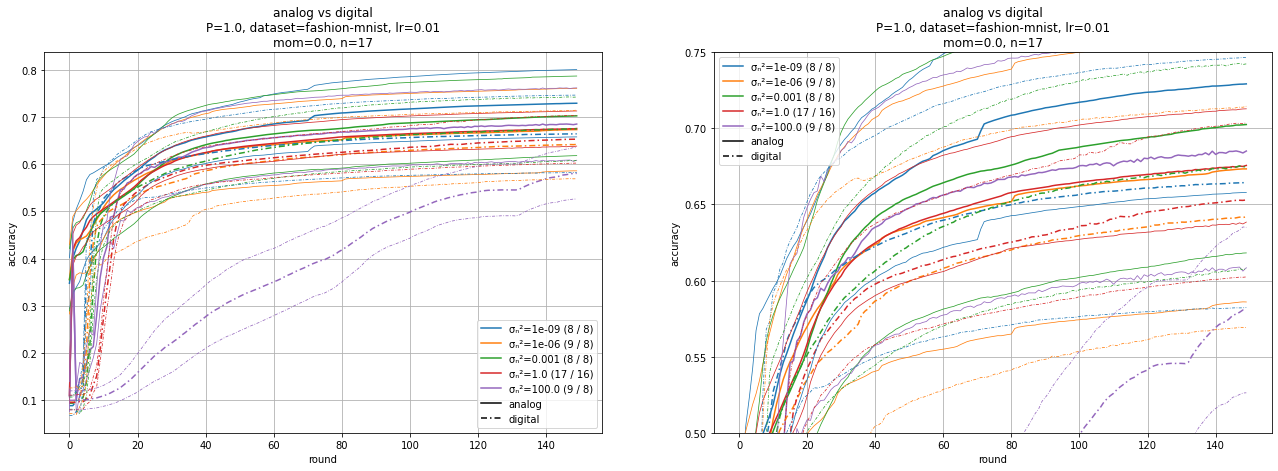

In [16]:
plot_analog_vs_digital(paths, clients=17, zoom_ylim=(0.5, 0.75))

- Skipping 51 runs that don't match on 1 keys: clients (51)
- Skipping 48 runs that don't match on 1 keys: clients (48)


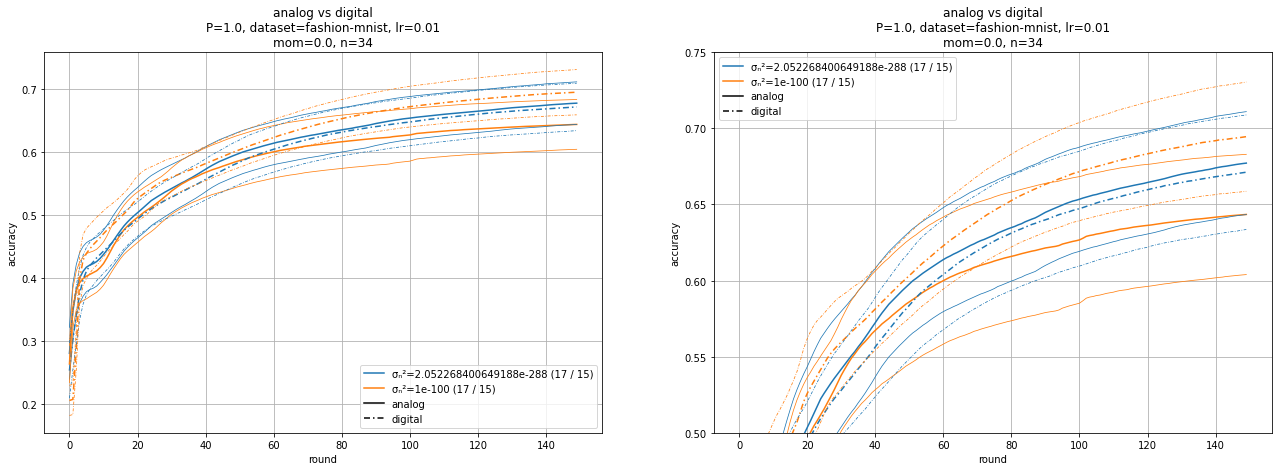

In [17]:
plot_analog_vs_digital(paths, clients=34, zoom_ylim=(0.5, 0.75))

Comparing this to the $n = 20$ plot pretty much flips the result, so it's probably a statistical tie.

# CIFAR-10 with the wrong learning rate and momentum

I forgot to set the learning rate and momentum arguments for these, so they use the default values of 0.01 and 0.0.

In [18]:
def get_comparison_specs(clients=20, noise='__all__'):
    common_specs = {
        'rounds':                 ('expect', 150),
        'batch_size':             ('expect', 64),
        'epochs':                 ('expect', 1),
        'ema_coefficient':        ('expect', 1 / 3),
        'data_per_client':        ('expect', None),
        'save_squared_error':     ('expect', False),
        'send':                   ('expect', 'deltas'),
        'power':                  ('title', 1.0),
        'dataset':                ('title', 'cifar10'),
        'lr_client':              ('title', 0.01),
        'momentum_client':        ('title', 0.0),
        'clients':                ('title', clients),
        'noise':                  ('series', noise),
    }
    analog_specs = common_specs.copy()
    analog_specs.update({
        'script': 'dynpower.py',
        'power_update_period':    ('expect', 1),
        'power_quantile':         ('expect', 0.9),
        'power_factor':           ('expect', 0.9),
    })
    digital_specs = common_specs.copy()
    digital_specs.update({
        'script': 'dynquant.py',
        'qrange_update_period':   ('expect', 1),
        'qrange_param_quantile':  ('expect', 0.9),
        'qrange_client_quantile': ('expect', 0.9),
        'channel_uses':           ('expect', None),
        'rounding_method':        ('expect', 'stochastic'),
        'parameter_schedule':     ('expect', 'staggered'),
        'zero_bits_strategy':     ('expect', 'read-zero'),
    })
    
    return analog_specs, digital_specs

In [19]:
default_zoom_ylim = (0.37, 0.45)

In [20]:
paths = [
    "results/20210816-cifar10-dynpower-popeye1/",
    "results/20210816-cifar10-dynpower-popeye2/",
    "results/20210816-cifar10-dynquant-popeye1/",
    "results/20210816-cifar10-dynquant-popeye2/",
]
show_timestamp_info(paths)

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **16 Aug 2021, 15:56:51** | 16 Aug 2021, 16:34:27 | 37 min 35 s |
| last to finish | 17 Aug 2021, 13:22:04 | **17 Aug 2021, 14:06:09** | 44 min 05 s |
| shortest | 16 Aug 2021, 18:28:39 | 16 Aug 2021, 19:06:13 | **37 min 34 s** |
| longest | 16 Aug 2021, 20:49:08 | 16 Aug 2021, 21:37:39 | **48 min 30 s** |


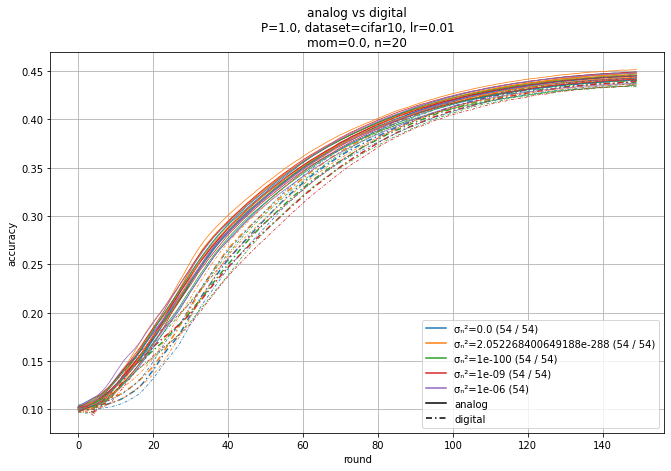

In [21]:
plot_analog_vs_digital(paths, clients=20)

We couldn't compare these to original plots or anything, but at first glance it does seem like the issues with statistical noise aren't so much of an issue here. 